#TP3 Visión por computadora
Encontrar el logotipo de la gaseosa dentro de

las imagenes provistas en Material_TPs/TP3/Images a partir del template Material_TPs/TP3/Template.

1.   (4 pts) Obtener una detección del logo en cada imagen sin falsos positivos.
2.   (4 pts) Plantear y validar un algoritmo para multiples detecciones en la imagen "coca_multi.png" con el mismo template del ítem 1.

3.   (2 pts) Generar un algoritmo del ítme 2 para todas las imagenes.






Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

# Importación de las librerias necesarias

In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression
from src.functions import *
from pathlib import Path


# Funciones de procesamiento

Obtener una detección del logo en cada imagen sin falsos positivos.

Logo a buscar (**Template**)

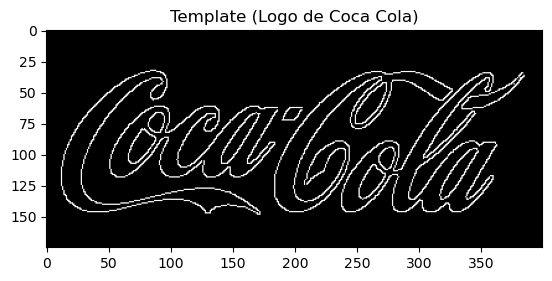

In [2]:
patternPath="Logo/pattern.png"
# load the image image, convert it to grayscale, and detect edges
template = cv.imread(patternPath)
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
template = cv.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]

plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title("Template (Logo de Coca Cola)")
plt.show()




## Busquedas Individuales

Para realizar este análisis se implemetaron unas funciones que permitan cargar la imagen y realizarle los ajustes necesarios que permitan mejorar el perfomance del algoritmo cv.matchTemplate. El mismo es sensible a la relación de escalas entre el objeto que estamos intentando encontrar y la imagen en la que estariamos realizando la busqueda.

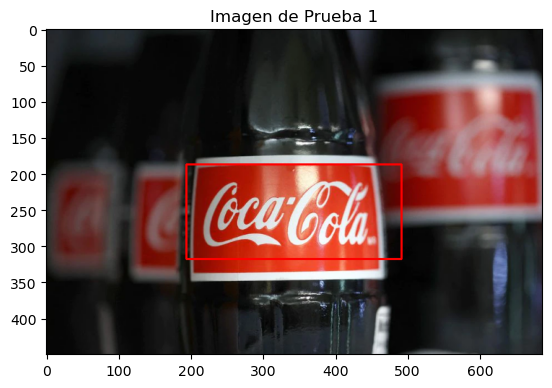

In [3]:
imagePath1 = "imagenes/logo_1.png"
imagen_1 = template_matching(imagePath1, patternPath, visualize=True)

plt.imshow(cv.cvtColor(np.array(imagen_1, dtype=np.uint8), cv.COLOR_BGR2RGB))
plt.title("Imagen de Prueba 1")
plt.show()


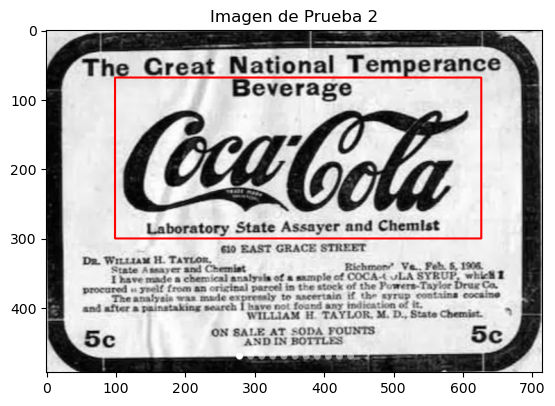

In [4]:
imagePath2 = "imagenes/coca_retro_1.png"
imagen_2 = template_matching(imagePath2, patternPath, visualize=True)

plt.imshow(cv.cvtColor(np.array(imagen_2, dtype=np.uint8), cv.COLOR_BGR2RGB))
plt.title("Imagen de Prueba 2")
plt.show()

# Busqueda mediante Loop en el directorio

Se implemento una sencilla función que permite ubicar en un directorio todas las imagenes cuya extensión sea **".jpg"** o ***".png"** que son extensiones propias de archivos de imagenes.

Se define en primera instancia el path o directorio general donde se contienen todas las imagenes.

In [5]:
current_path = os.getcwd()
image_path = os.path.join(current_path,'imagenes\\')

In [6]:
files = read_from_path(image_path)
files_not_pattern = [file for file in files if file not in patternPath]
files_not_pattern

['C:\\Users\\Aedin\\TP3\\imagenes\\COCA-COLA-LOGO.jpg',
 'C:\\Users\\Aedin\\TP3\\imagenes\\coca_logo_1.png',
 'C:\\Users\\Aedin\\TP3\\imagenes\\coca_logo_2.png',
 'C:\\Users\\Aedin\\TP3\\imagenes\\coca_multi.png',
 'C:\\Users\\Aedin\\TP3\\imagenes\\coca_retro_1.png',
 'C:\\Users\\Aedin\\TP3\\imagenes\\coca_retro_2.png',
 'C:\\Users\\Aedin\\TP3\\imagenes\\logo_1.png']

Se ejecuta el loop y se aplica la función de matching

**template_matching(image_path, pattern_path, visualize=True)**

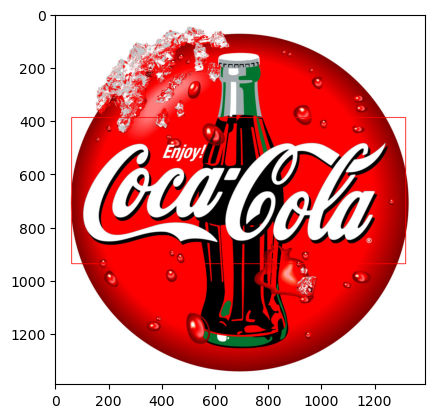

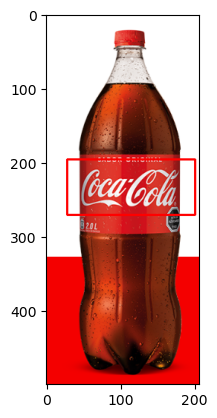

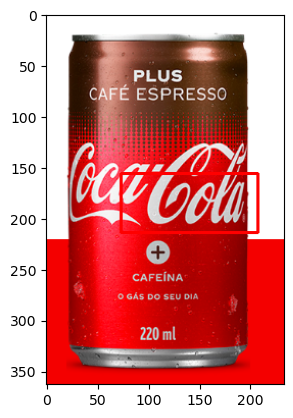

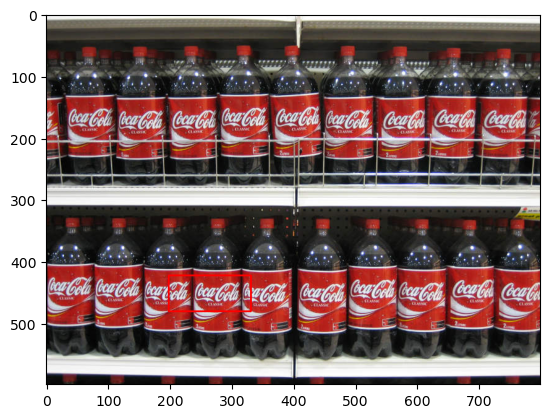

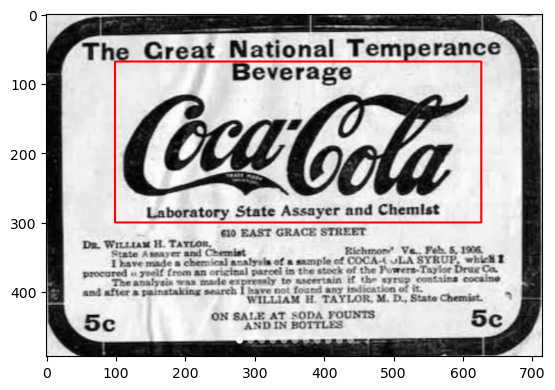

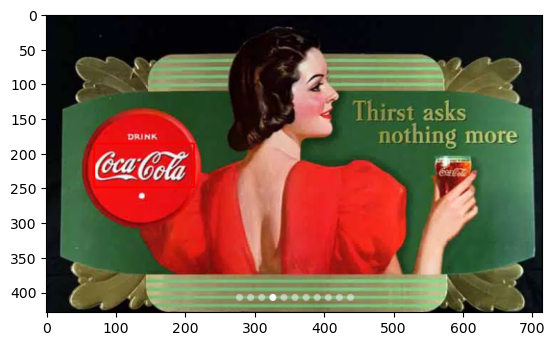

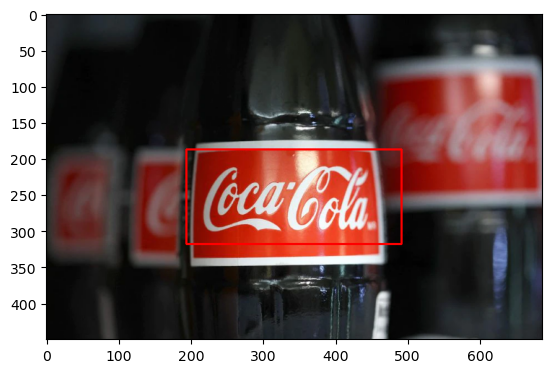

In [15]:
# Ejecución en loop
for path in files_not_pattern:
    imagen = template_matching(path, patternPath, visualize=True)
    plt.imshow(cv.cvtColor(np.array(imagen, dtype=np.uint8), cv.COLOR_BGR2RGB))
    plt.show()

# Revisión de la imagen con multiples coincidencias.

Por último queda la busqueda para multiples coincidencias.


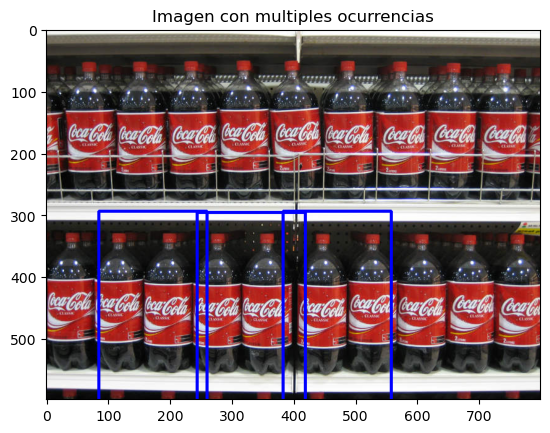

In [31]:
#Lectura de la imagen
img = cv.imread("imagenes/coca_multi.png")
temp = cv.imread(patternPath)

# Acceso a las coordenadas
W, H = temp.shape[:2]

# Defino el umbral mínimo
thresh = 0.0352

# PAsaje a escala de grises
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.Canny(img_gray, 50, 200)
temp_gray = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
template_gray = cv.Canny(template, 50, 200)
# PAsaje del parámetro al algoritmo "cv.matchTemplate"
match = cv.matchTemplate(
    image=img_gray, templ=temp_gray,
  method=cv.TM_CCOEFF_NORMED)

# Selecciona los rectángulos para
# confianza superior al threshold
(y_points, x_points) = np.where(match >= thresh)

# Inicializa la lista
boxes = list()

# loop sobre las coordenadas
for (x, y) in zip(x_points, y_points):

    # Actualiza los rectángulos
    boxes.append((x, y, x + W, y + H))

# aplicar supresión no máxima a los rectángulos
# esto creará un único cuadro delimitador
boxes = non_max_suppression(np.array(boxes))


# recorrer los cuadros delimitadores finales
for (x1, y1, x2, y2) in boxes:

    # dibuja los cuadros
    cv.rectangle(img, (x1, y1), (x2, y2),
                  (255, 0, 0), 3)

# Muestra las imagenes

plt.imshow(cv.cvtColor(np.array(img, dtype=np.uint8), cv.COLOR_BGR2RGB))
plt.title("Imagen con multiples ocurrencias")
plt.show()